In [2]:
from math import pow, sqrt
def adc(Vt, alt):
    rho0   = 2.377e-3               # slugs/ft3, seal-level density
    TFAC = 1.0 - 0.703e-5*alt
    T     = 519.0*TFAC
    if(alt > 35000.0):
        T = 390.0
    rho = rho0 * (pow(TFAC, 4.14))  # density
    Mach = Vt/sqrt(  1.4*1716.3*T )
    qbar = 0.5*rho*Vt*Vt
    return (Mach,qbar)
    
print(adc(0,0))

(0.0, 0.0)


In [3]:
def transp(t,x,u):
    S      = 2170.0   # wing area, ft2
    cbar   =   17.5   # ft
    mass   =    5.0e3 # slugs
    Iyy    =    4.1e6 # slug-ft2
    Tstat  =    6.0e4
    dTdV   =  -38.0
    ZE     =    2.0     # ft, distance from Thrust to cgt
    cdcls  =    0.042
    CLA    =    0.085   # per degree, stability-axis aero derivative
    CMA    =   -0.022   # per degree, stability-axis aero derivative
    CMDE   =   -0.016   # per degree, stability-axis aero derivative
    CMQ    =  -16.0     # per radian, pitch damping coeff.
    CMADOT =   -6.0     # per radian, pitch damping coeff. per radian
    CLADOT =    0.0     # per radian
    RTOD   =   57.29578 # degrees/radian, radians to degrees conversion factor.
    GD     =   32.17    # ft/s2, gravity
    
    
    
    
    

In [2]:

# model.py
from mesa.space import MultiGrid
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector



def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini},  # A function to call
            agent_reporters={"Wealth": "wealth", "Var":"myvar"})  # An agent attribute
    
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        self.myvar  = 3

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()

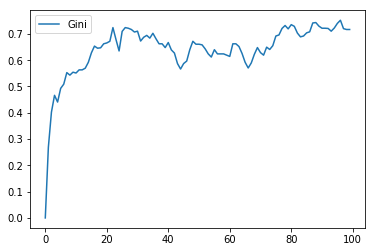

In [69]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [3]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()


NameError: name 'model' is not defined

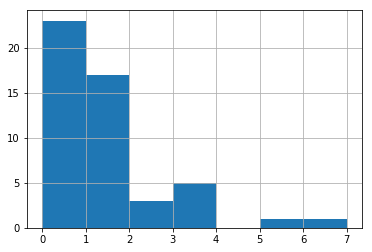

In [62]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

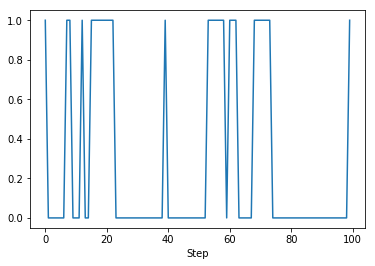

In [63]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()